# Módulo 10 tarefa 03
Considere a mesma base de dados utilizada na tarefa 1 ```previsao_de_renda.csv```.

1) Construa um gráfico de barras para avaliar a distribuição das variáveis qualitativas no tempo. Você acha que houve alguma alteração importante a ser investigada?

In [3]:
import pandas as pd
        
previsao_de_renda = pd.read_csv('../../../../Datasets/previsao_de_renda.csv', sep = ',')

In [4]:
variaveis_quantitativas = previsao_de_renda.select_dtypes(include=['float64', 'int64']).columns

In [14]:
variaveis_qualitativas = previsao_de_renda.select_dtypes(include=['object']).columns
# tirando data_ref de variaveis_qualitativas
variaveis_qualitativas = variaveis_qualitativas.drop('data_ref')

In [15]:
previsao_de_renda[variaveis_qualitativas].head()    

,sexo,tipo_renda,educacao,estado_civil,tipo_residencia
0,F,Assalariado,Secundário,Casado,Casa
1,M,Empresário,Secundário,Casado,Casa
2,M,Assalariado,Superior completo,Casado,Casa
3,F,Empresário,Secundário,Casado,Casa
4,M,Assalariado,Secundário,Casado,Casa


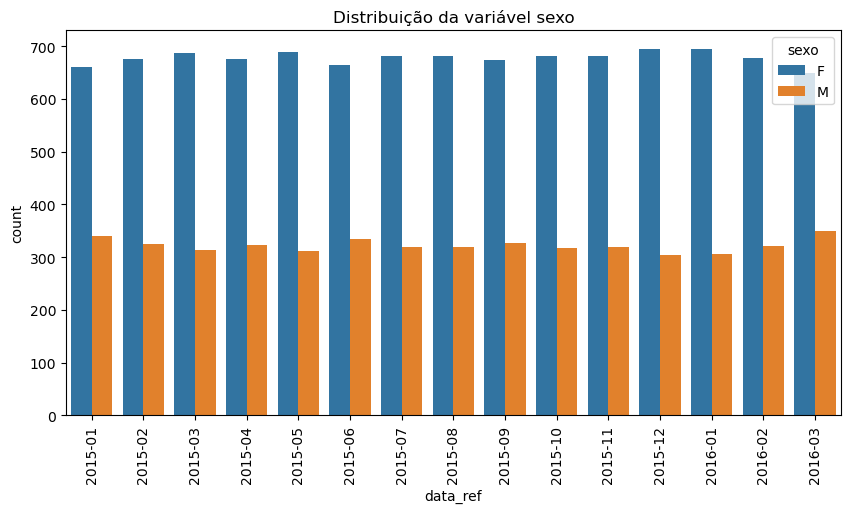

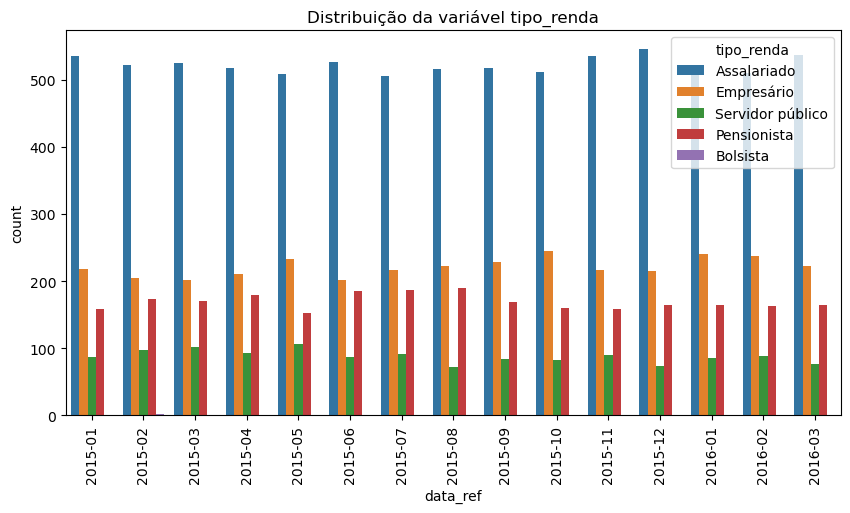

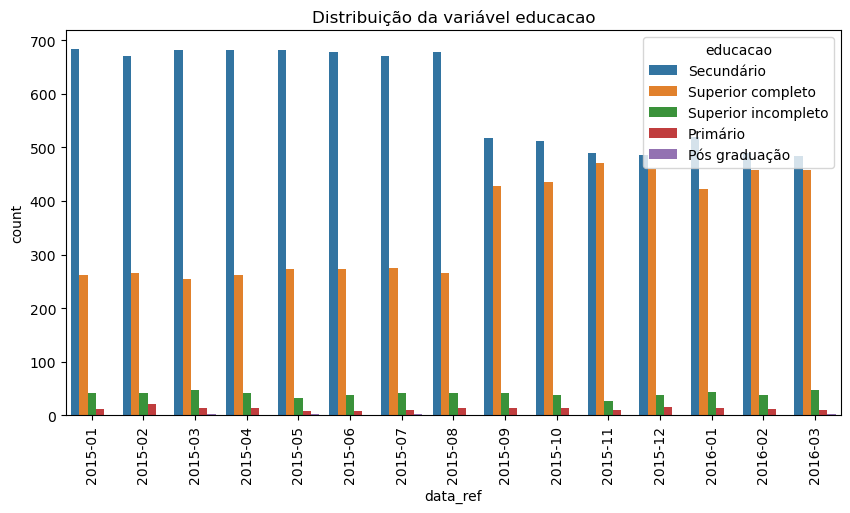

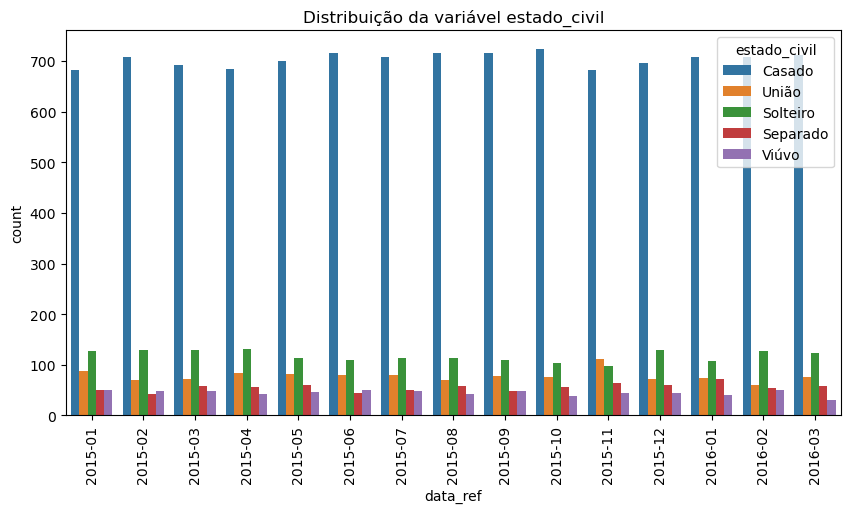

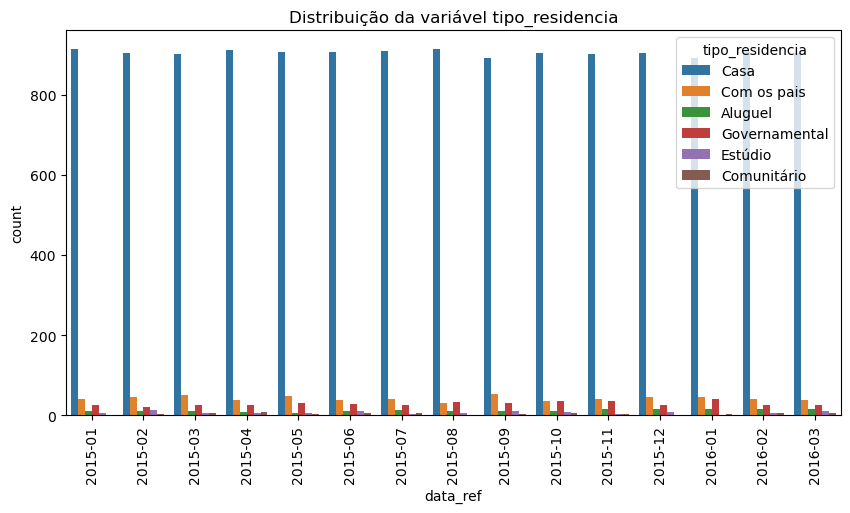

In [27]:
# Construa um gráfico de barras para avaliar a distribuição das variáveis qualitativas no tempo
import matplotlib.pyplot as plt
import seaborn as sns

# setting tick labels

ticks_labels = previsao_de_renda['data_ref'].map(lambda x: x.strftime('%Y-%m')).unique()    


for variavel in variaveis_qualitativas:
    plt.figure(figsize=(10, 5))
    ax = sns.countplot(x='data_ref', hue= variavel, data=previsao_de_renda)
    ticks = ax.set_xticks(range(len(ticks_labels)))
    labels = ax.set_xticklabels(ticks_labels, rotation=90)
    plt.title(f'Distribuição da variável {variavel}')
    plt.show()

Na Educacao, a partir de 2015-08 para 2015-09, a quantidade de registros com o valor 'Ensino Superior' aumentou consideravelmente enquanto secundario diminuiu.

2) Para cada variável qualitativa, construa um gráfico mostrando as médias de cada nível da variável no tempo e avalie a estabilidade. Houve alguma alteração importante? Você acha que se pode utilizar essas variáveis em uma modelagem?

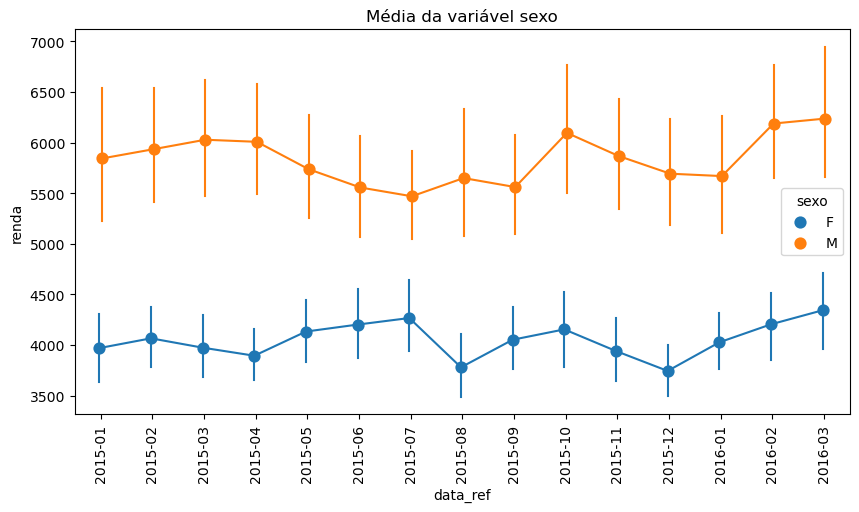

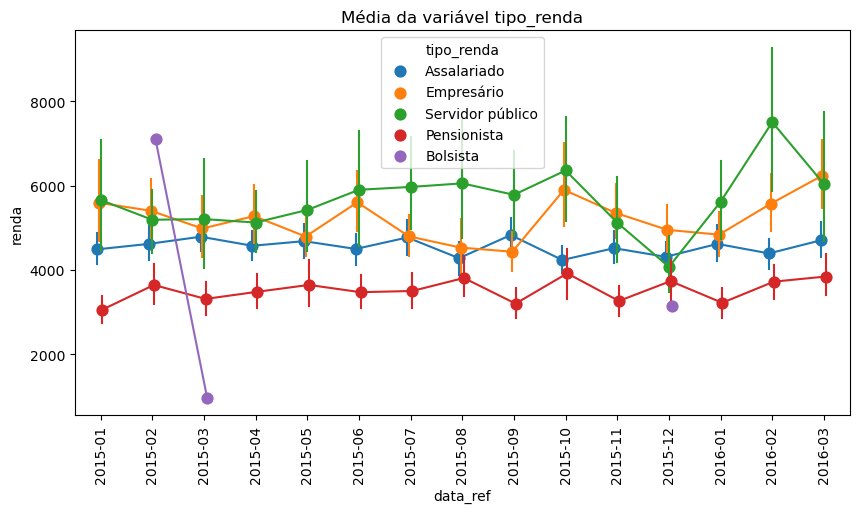

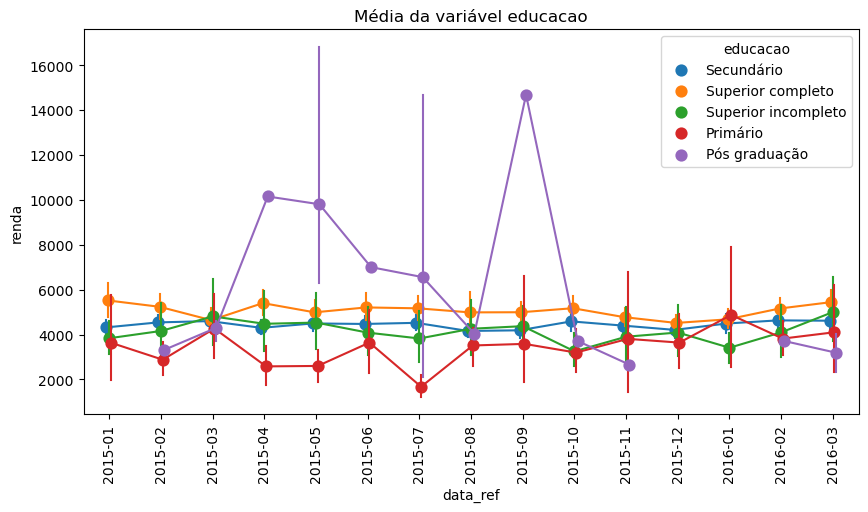

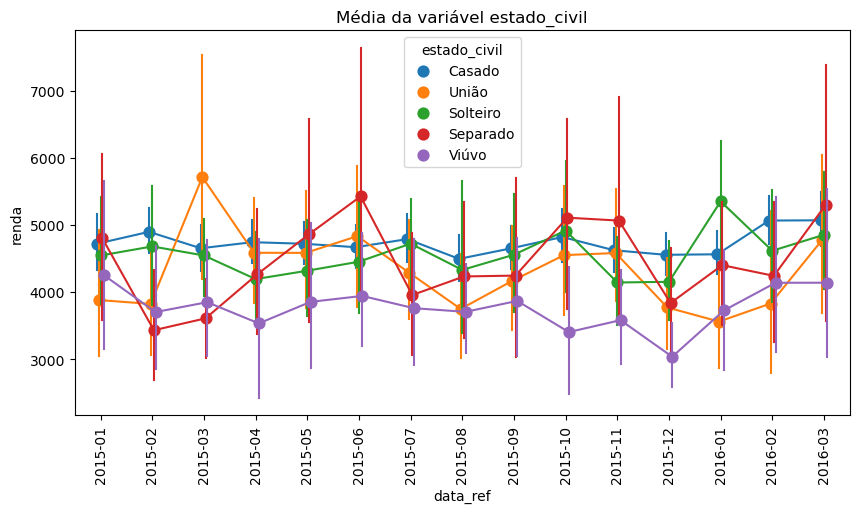

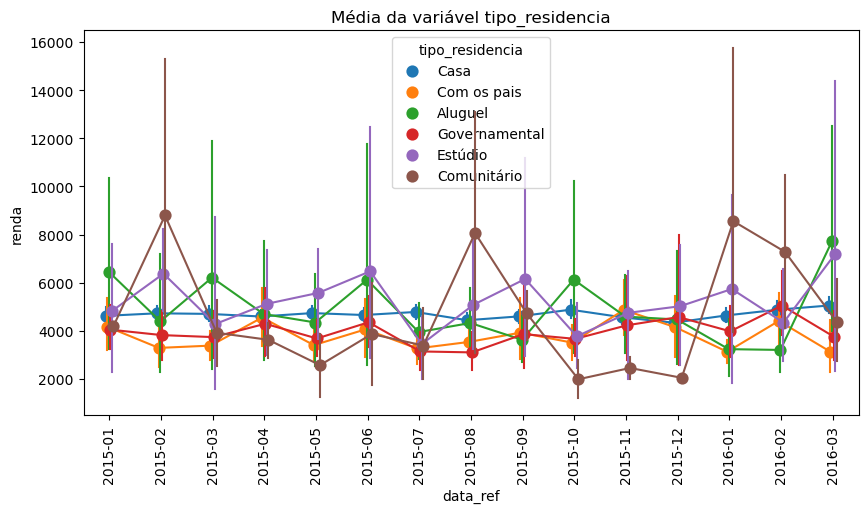

In [35]:
# Construa um gráfico de barras para avaliar a distribuição das variáveis qualitativas no tempo com a média
for variavel in variaveis_qualitativas:
    plt.figure(figsize=(10, 5))
    ax = sns.pointplot(x='data_ref', y='renda', hue= variavel, data=previsao_de_renda, errorbar=('ci', 95), dodge=True)
    # setando espessura das linhas
    for line in ax.lines:
        line.set_linewidth(1.5)
    ticks = ax.set_xticks(range(len(ticks_labels)))
    labels = ax.set_xticklabels(ticks_labels, rotation=90)
    plt.title(f'Média da variável {variavel}')
    plt.show()
    

sexo: estavel
Tipo de renda: 2016-01 houve mudança significativa entre empresários e servidores públicos aos demais 
tipo de residencia: podemos observar apenas que a média de renda de quem mora em casa própria é mais estável que os demais que possuem uma variação maior
estado civil: da mesma forma que tipo de residencia, a média de renda de quem é casado é mais estável que os demais o resto possui uma variação maior que não é interessante para modelagem.
educacao: em 2016-01 houve uma mudança significativa entre ensino superior completo e incompleto, mas de resto existe um overlapping muito grande da variação de renda entre os níveis de educação o quê não atinge o nivel de significancia para modelagem.
